# Libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Dataset & Preprocessing

In [2]:
# Load the dataset
data = pd.read_csv('placementdata.csv')

# Display the first few rows of the dataset
data.head()


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [3]:
# Drop rows with missing values
data.dropna(inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_19488\1678729853.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PlacementStatus', data=data, palette='viridis')


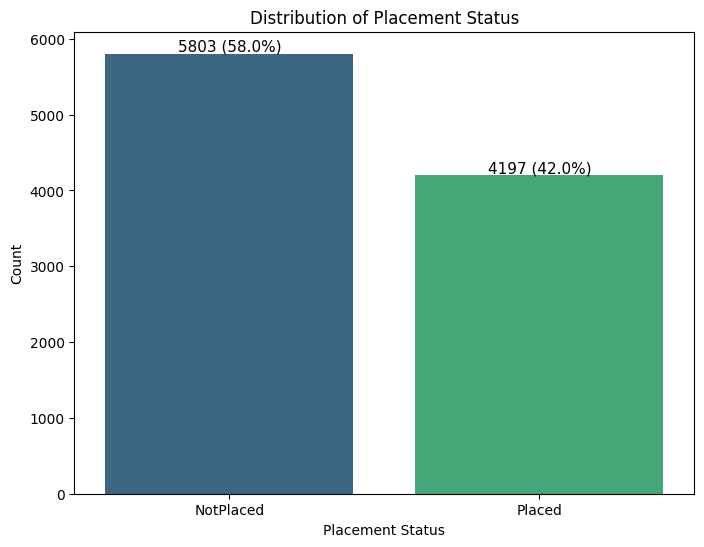

In [4]:
placement_counts = data['PlacementStatus'].value_counts()
placement_percentages = (placement_counts / len(data)) * 100

# Visualize the distribution of placement status (with percentages)
plt.figure(figsize=(8, 6))
sns.countplot(x='PlacementStatus', data=data, palette='viridis')
plt.title('Distribution of Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Count')

# Annotate the percentages on the bars
for p in plt.gca().patches:
    height = p.get_height()
    percentage = (height / len(data)) * 100  # Calculate the percentage
    plt.gca().annotate(f'{height:.0f} ({percentage:.1f}%)', 
                       (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

In [5]:
# Data Preprocessing

# Drop the StudentID column
data.drop(columns=['StudentID'], inplace=True)

# Define Categorical, Numerical Features & Target
categorical_columns = ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']
numerical_columns = [col for col in data.columns if col not in categorical_columns]
target = 'PlacementStatus'

# Encode Categorical Features (Excluding Target)
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale Only Numerical Features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
print("Preprocessed Data:")
print(data.head())

Preprocessed Data:
       CGPA  Internships  Projects  Workshops/Certifications  \
0 -0.309343    -0.073889 -1.182822                 -0.014598   
1  1.877818    -1.575689  1.121526                  1.091319   
2 -0.621794    -0.073889 -0.030648                  1.091319   
3 -0.309343    -0.073889 -1.182822                  1.091319   
4  0.940464    -0.073889 -0.030648                  1.091319   

   AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0          -1.770910          0.184742                          0   
1           1.292970         -0.787072                          1   
2           0.312528          1.156555                          1   
3           0.680194          0.184742                          1   
4           0.802749          0.427695                          1   

   PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  
0                  0  -0.782306   0.504368                0  
1                  1   0.847618   0.840726               

In [6]:
# Remove rows with missing labels (PlacementStatus)
data_clean = data.dropna(subset=['PlacementStatus']).copy()

# Extract features (excluding the target variable)
features = data_clean.iloc[:, :-1]  # Use data_clean, not data

# K-Means Clusetring

In [7]:

# Apply K-Means Clustering
num_clusters = 2  
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
data_clean['Cluster'] = kmeans.fit_predict(features)  # Assign clusters to data_clean

# Map Clusters to Placement Labels
cluster_map = data_clean.groupby('Cluster')['PlacementStatus'].mean()
placement_mapping = {cluster_map.idxmax(): 1, cluster_map.idxmin(): 0}
data_clean['Predicted_Placement'] = data_clean['Cluster'].map(placement_mapping)

print(data_clean.head())  # Verify output

       CGPA  Internships  Projects  Workshops/Certifications  \
0 -0.309343    -0.073889 -1.182822                 -0.014598   
1  1.877818    -1.575689  1.121526                  1.091319   
2 -0.621794    -0.073889 -0.030648                  1.091319   
3 -0.309343    -0.073889 -1.182822                  1.091319   
4  0.940464    -0.073889 -0.030648                  1.091319   

   AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0          -1.770910          0.184742                          0   
1           1.292970         -0.787072                          1   
2           0.312528          1.156555                          1   
3           0.680194          0.184742                          1   
4           0.802749          0.427695                          1   

   PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  Cluster  \
0                  0  -0.782306   0.504368                0        0   
1                  1   0.847618   0.840726              

C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


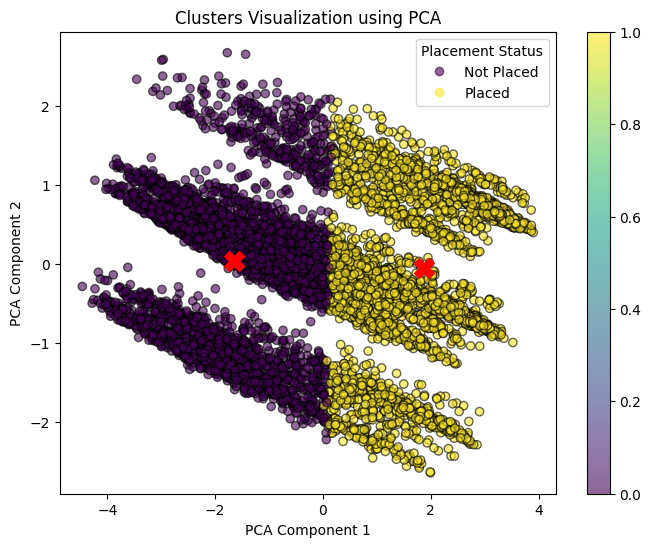

In [8]:
# Cluster Visualization with Center Points
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

# Get cluster centers
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
scatter= plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.predict(features), cmap='viridis', alpha=0.6, edgecolor='k')
plt.colorbar()
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='X', s=200, label="Cluster Centers")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters Visualization using PCA")
# Custom legend for PlacementStatus
handles, labels = scatter.legend_elements(prop="colors")
custom_labels = ['Not Placed' if status == 0 else 'Placed' for status in data_clean['PlacementStatus'].unique()]
plt.legend(handles, custom_labels, title="Placement Status")

plt.show()

# Performance Evaluation

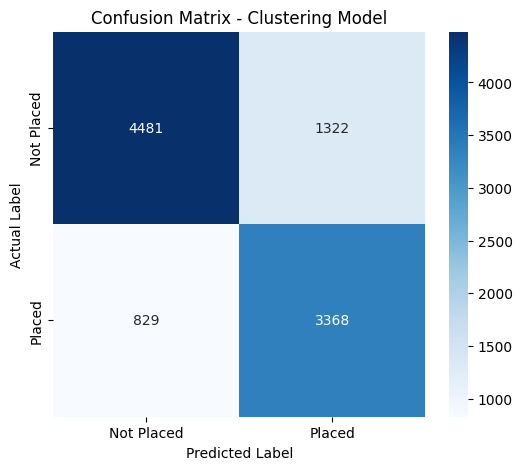

In [9]:
# Confusion Matrix
y_clean = data_clean['PlacementStatus']
cm = confusion_matrix(y_clean, data_clean['Predicted_Placement'])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Clustering Model")
plt.show()

In [10]:
# Evaluation Metrics
accuracy = accuracy_score(y_clean, data_clean['Predicted_Placement'])
precision = precision_score(y_clean, data_clean['Predicted_Placement'])
recall = recall_score(y_clean, data_clean['Predicted_Placement'])
f1 = f1_score(y_clean, data_clean['Predicted_Placement'])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7849
Precision: 0.7181
Recall: 0.8025
F1-Score: 0.7580
